In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&K%C3%98N=TOT&CIVILSTAND=*&OMR%C3%85DE=*"

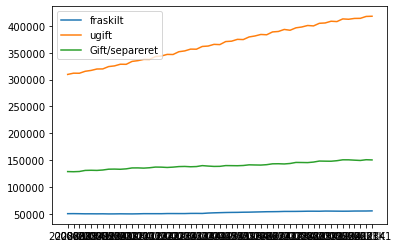

In [93]:
dst = pd.read_csv(url,sep=";")
##dst.columns
list(dst['CIVILSTAND'])
ug_dk = dst.loc[(dst['CIVILSTAND']=='Ugift')].iloc[:]
g_dk = dst.loc[(dst['CIVILSTAND']=='Fraskilt')].iloc[:]
h = dst[dst['CIVILSTAND'].isin(['Fraskilt', 'Ugift'])]
k = dst.TID.unique()
k
##print(k)
def number_of_people_per_neighbourhood_given_year(mask,n):
    sum_of_people = dst.loc[mask & (dst['TID'] == n), 'INDHOLD'].sum()
    return sum_of_people

fraskilt = (dst['CIVILSTAND'] == 'Fraskilt')
fs = [number_of_people_per_neighbourhood_given_year(fraskilt,n) for n in k]
##print(fs)

nu = ['2020K1','2020K2','2020K3','2020K4']
##plt.plot(k, fs)

def number_of_lonely(city,n):
    ugift = (dst['OMRÅDE'] == city)&(dst['CIVILSTAND'] == 'Ugift')
    ugcph = [number_of_people_per_neighbourhood_given_year(ugift,n)]
    gift =((dst['OMRÅDE'] == city)&(dst['CIVILSTAND'] != 'Ugift'))
    gcph = [number_of_people_per_neighbourhood_given_year(gift,n)]
    p = sum(ugcph)/sum(gcph)
    return p

def Average(lst): 
    return sum(lst) / len(lst)

lscph = [number_of_lonely('København',n) for n in nu]
lsAa = [number_of_lonely('Aarhus',n) for n in nu]
lsOO = [number_of_lonely('Odense',n) for n in nu]
lsAal = [number_of_lonely('Aalborg',n) for n in nu]
lsEs = [number_of_lonely('Esbjerg',n) for n in nu]
Byer = ['København','Aarhus','Odense','Aalborg','Esbjerg']
pLonely = [Average(lscph),Average(lsAa),Average(lsOO),Average(lsAal),Average(lsEs)]

##plt.bar(Byer,pLonely)

ugiftCPH =((dst['OMRÅDE'] == 'København')&(dst['CIVILSTAND'] == 'Ugift'))
ugcphCPH = [number_of_people_per_neighbourhood_given_year(ugiftCPH,n) for n in k]

fraCPH =((dst['OMRÅDE'] == 'København')&(dst['CIVILSTAND'] == 'Fraskilt'))
fcphCPH = [number_of_people_per_neighbourhood_given_year(fraCPH,n) for n in k]

giftCPH =((dst['OMRÅDE'] == 'København')&(dst['CIVILSTAND'] == 'Gift/separeret'))
gcphCPH = [number_of_people_per_neighbourhood_given_year(giftCPH,n) for n in k]

plt.plot(k, fcphCPH, label="fraskilt")
plt.plot(k, ugcphCPH, label="ugift")
plt.plot(k, gcphCPH, label="Gift/separeret")
plt.legend(loc="upper left")

